In [1]:
import torch
import torchvision
from torch.profiler import ProfilerActivity, profile, record_function

In [2]:
# ResNet50 の準備
model = torchvision.models.resnet50()
model = model.to("cuda")
model.eval()

# ダミー画像を用意
input_image = torch.ones((128, 3, 224, 224))
input_image = input_image.to("cuda")

# ウォームアップのため一度走らせる
with torch.no_grad():
    output = model(input_image)

with profile(activities=[ProfilerActivity.CPU, ProfilerActivity.CUDA]) as prof:
    with record_function("model_inference"):
        model(input_image)

In [3]:
print(prof.key_averages().table(sort_by="cuda_time_total", row_limit=10))

-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                        model_inference         0.00%       0.000us         0.00%       0.000us       0.000us      55.580ms       100.30%      55.580ms      55.580ms             1  
                                        model_inference         1.55%     874.051us        14.92%       8.430ms       8.430ms       0.000us         0.00%      55.412ms      55.412ms             1  
         

In [4]:
prof.export_chrome_trace("trace.json")

まず、[chrom://tracing](chrome://tracing ) にアクセス。すると以下のような画面になる。

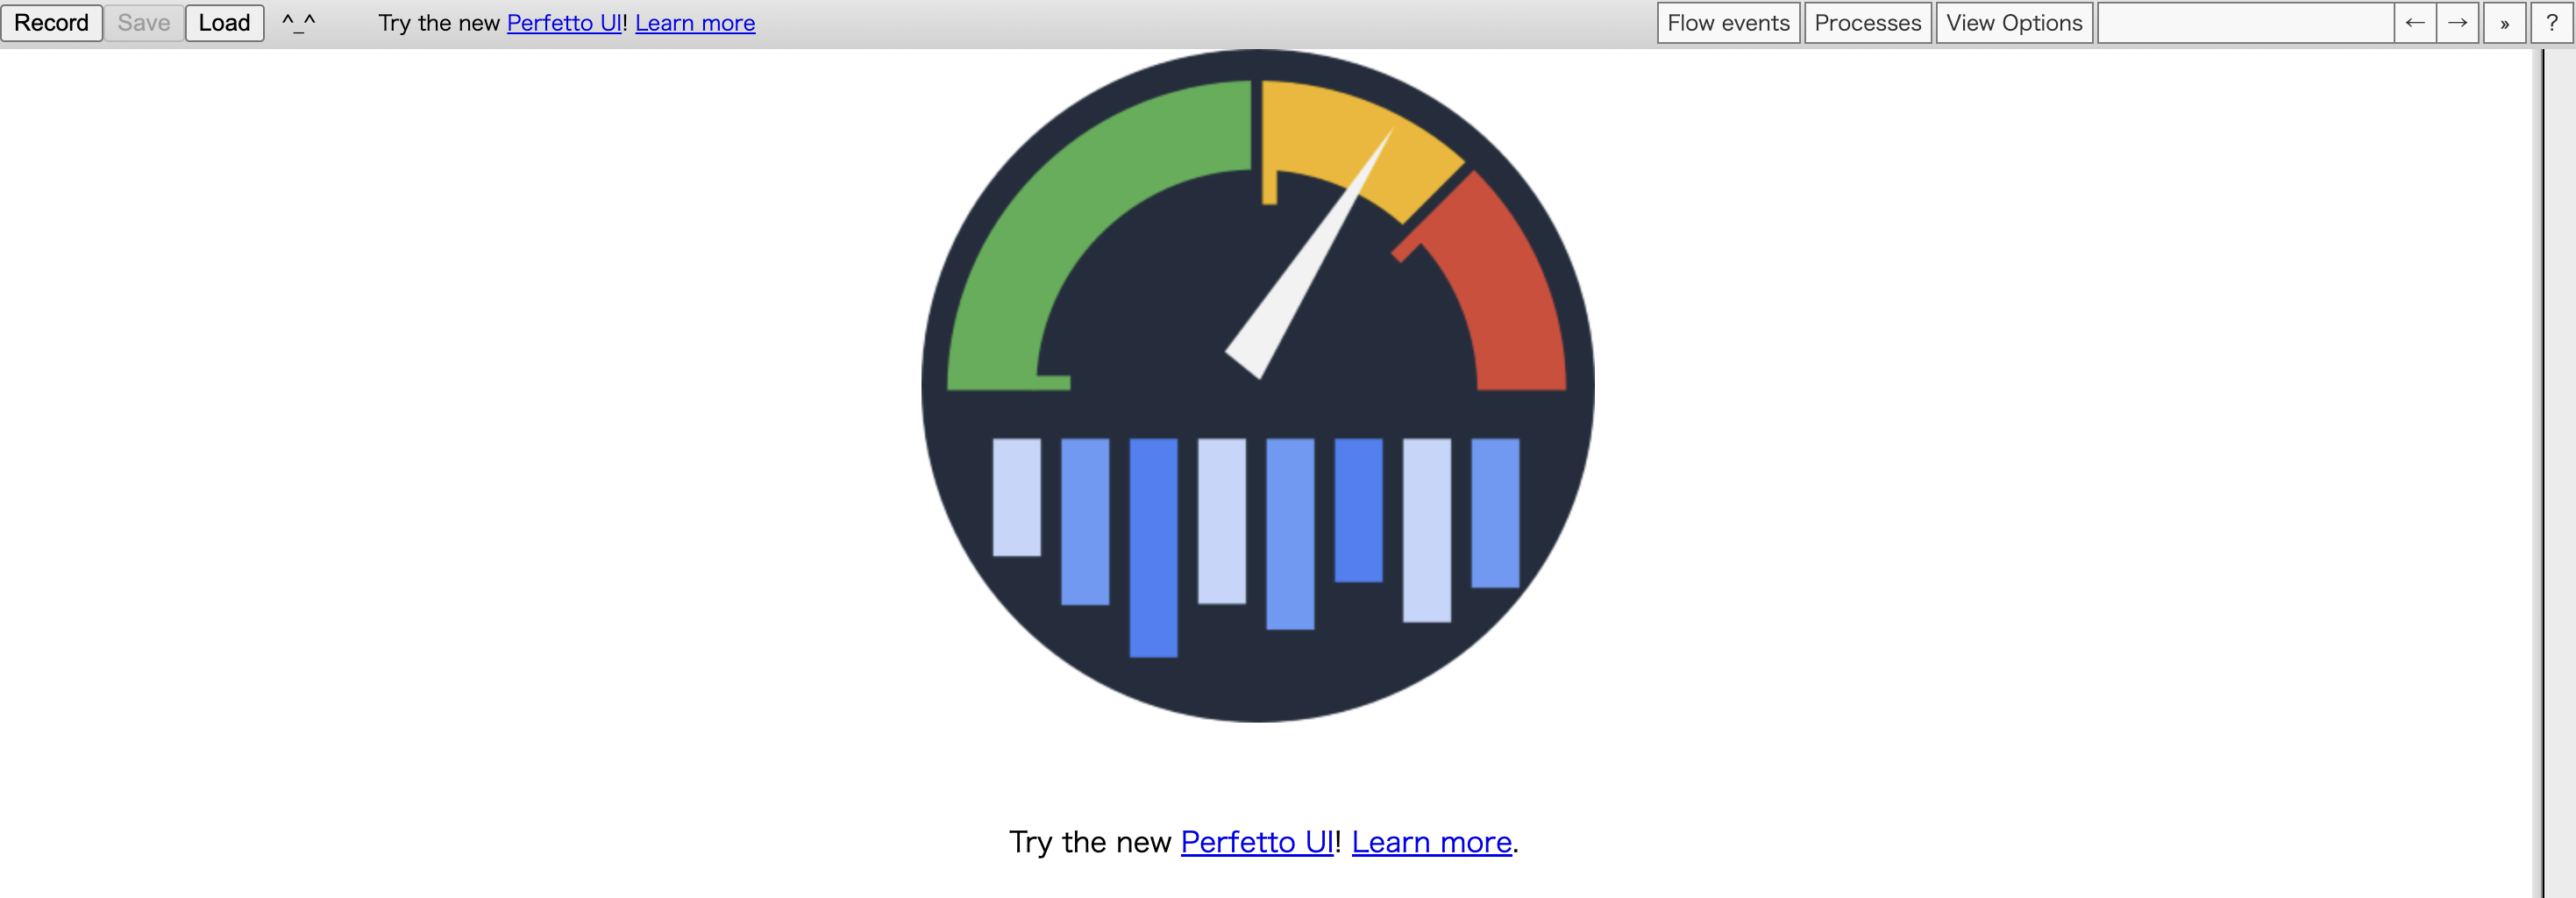

左上の"Load"というボタンからGUI操作で作成したtrace.jsonを読み込めば以下のような画面が出る。

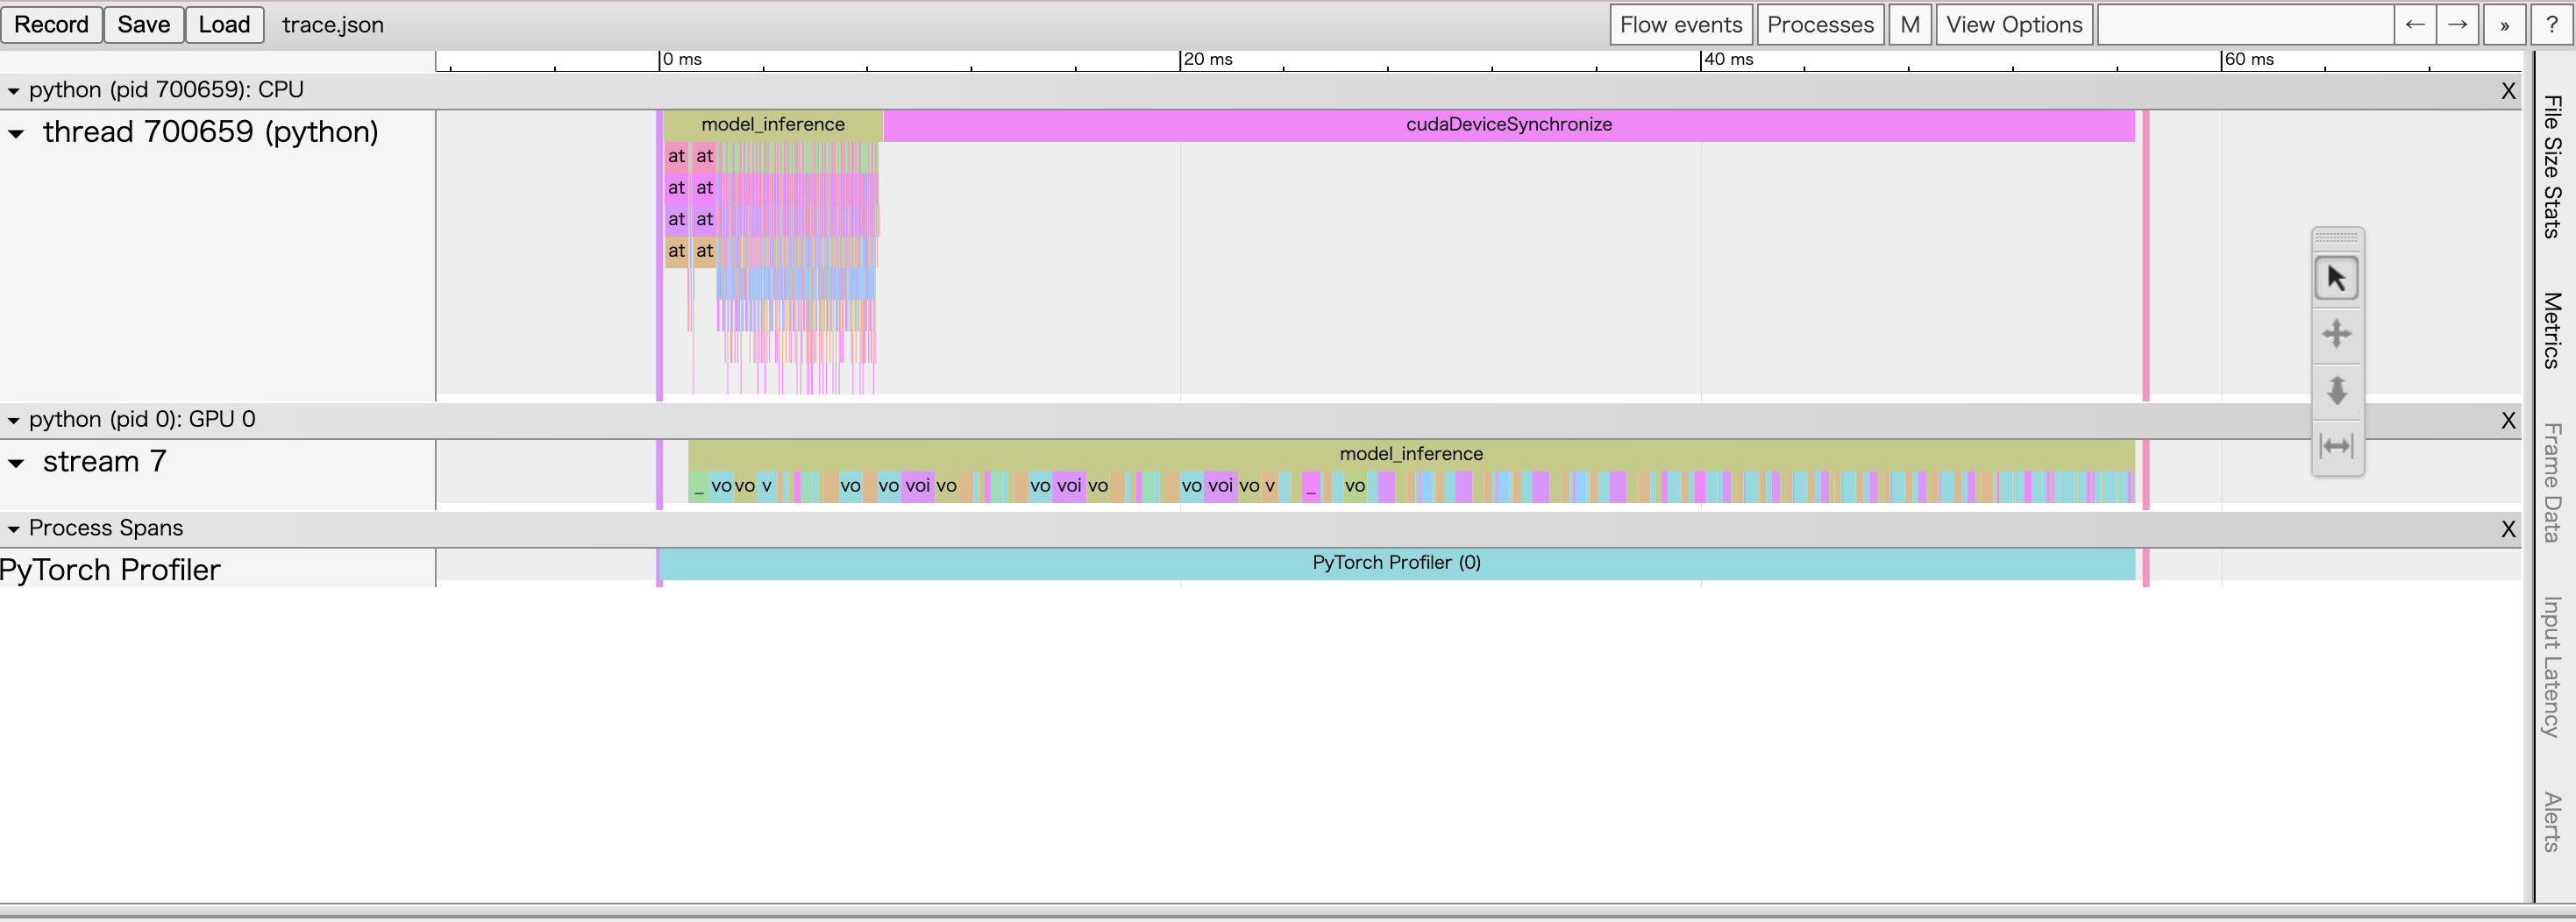

さらなる参考：https://pytorch.org/tutorials/intermediate/tensorboard_profiler_tutorial.html